## 1

In [10]:
import igraph as ig

# print(ig.Graph.__plot__.__doc__)

In [11]:
from lab3.graph_generator import generate_connected_graph, generate_weights_matrix

graph = generate_connected_graph(5, 6)
weights = generate_weights_matrix(graph, 1, 10)

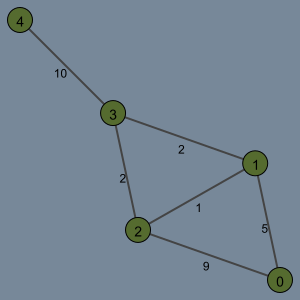

In [12]:
# create an empty graph with the number of vertices equal to the number of rows in the matrix
g = ig.Graph(n=len(weights), directed=False)

# add edges to the graph for all non-None values in the matrix
for i in range(len(weights)):
    for j in range(i + 1, len(weights)):
        if weights[i][j] is not None:
            g.add_edge(i, j, weight=weights[i][j])

ig.plot(g, vertex_label=range(0, len(weights)), edge_label=g.es['weight'], vertex_size=25,
        vertex_color='Dark Olive Green',
        edge_width=2, background='Light Slate Gray', bbox=(300, 300))

In [13]:
print(graph)
print(weights)

{0: [2, 1], 1: [2, 3, 0], 2: [1, 0, 3], 3: [1, 4, 2], 4: [3]}
[[None, 5, 9, None, None], [5, None, 1, 2, None], [9, 1, None, 2, None], [None, 2, 2, None, 10], [None, None, None, 10, None]]


## 2

In [14]:
from lab3.graph_dijkstra import GraphDijkstra

alg = GraphDijkstra(graph, weights, 0)
alg.print_shortest_paths()

0 -> 0 (0): [0]
0 -> 1 (5): [0, 1]
0 -> 2 (6): [0, 1, 2]
0 -> 3 (7): [0, 1, 3]
0 -> 4 (17): [0, 1, 3, 4]


## 3

In [15]:
from lab3.graph_distance_matrix import graph_distance_matrix

m = graph_distance_matrix(graph, weights)
print(' ', end='')
print(''.join([''.join(['{:4}'.format(item) for item in range(0, len(m))])]))
print('\n'.join([''.join(['_' * 4 for item in range(0, len(m))])]))
print('\n'.join(
    [''.join([f'{item:4}' if j > 0 else f'{i} |{item:2}' for j, item in enumerate(row)]) for i, row in enumerate(m)]))

    0   1   2   3   4
____________________
0 | 0   5   6   7  17
1 | 5   0   1   2  12
2 | 6   1   0   2  12
3 | 7   2   2   0  10
4 |17  12  12  10   0


## 4

In [16]:
from lab3.graph_centre_minmax import graph_centre_minimax

center, minmax = graph_centre_minimax(graph, weights)

print(f'Possible centers: {", ".join(map(str, center[0]))}, distance sum: {center[1]}')
print(f'Possible minmax: {", ".join(map(str, minmax[0]))}, max distance: {minmax[1]}')

Possible centers: 1, distance sum: 20
Possible minmax: 3, max distance: 10


## 5

In [17]:
from lab3.graph_min_spanning_tree import find_min_spanning_tree

span_tree = find_min_spanning_tree(graph, weights)
print(span_tree)

{4: [3], 3: [4, 1], 1: [3, 2, 0], 2: [1], 0: [1]}


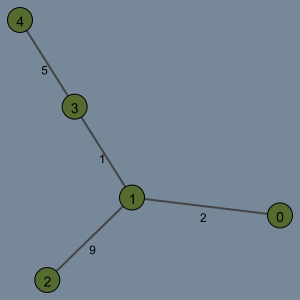

In [18]:
g1 = ig.Graph(n=len(span_tree.keys()), directed=False)

for i in span_tree.keys():
    for j in range(i + 1, len(weights)):
        if weights[i][j] is not None and j in span_tree[i]:
            g1.add_edge(i, j, weight=weights[i][j])

ig.plot(g1, vertex_label=range(0, len(weights)), edge_label=g.es['weight'], vertex_size=25,
        vertex_color='Dark Olive Green',
        edge_width=2, background='Light Slate Gray', bbox=(300, 300))
